In [ ]:
## 2a) 
!pip install numpy
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt 

  Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl (12.6 MB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.8-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.8-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp312-cp312-win_amd64.wh

In [2]:
# Acknowledgement: I used code from this github: https://github.com/cfinch/Shocksolution_Examples/blob/master/PairCorrelation/paircorrelation.py
# I commented any changes I made to the code (though there aren't many), and paraphrased some of the explanatory comments to better understand the source code.   

def pairCorrelationFunction_2D(x, y, S, rMax, dr): #Katya's note: This code is defining the function! 
    """Compute 2D pair correlation function (aka radial distribution function, for a set of circular particles contained in a square region of a plane. 
    This function finds reference particles s.t. a circle of radius rMax drawn around the particle will fit entirely within the square, eliminating 
    the need to compensate for edge effects.  If no such particles exist, an error is returned.

    Arguments:
        x               an array of x positions of centers of particles
        y               an array of y positions of centers of particles
        S               length of each side of the square region of the plane
        rMax            outer diameter of largest annulus
        dr              increment for increasing radius of annulus

    Returns a tuple: (g, radii, interior_indices)
        g(r)            a numpy array containing the correlation function g(r)
        radii           a numpy array containing the radii of the
                        annuli used to compute g(r)
        reference_indices   indices of reference particles
    """
    from numpy import zeros, sqrt, where, pi, mean, arange, histogram
    # Number of particles in ring/area of ring/number of reference particles/number density
    # area of ring = pi*(r_outer**2 - r_inner**2)

    # Find particles which are close enough to the box center that a circle of radius
    # rMax will not cross any edge of the box
    bools1 = x > rMax
    bools2 = x < (S - rMax)
    bools3 = y > rMax
    bools4 = y < (S - rMax)
    interior_indices, = where(bools1 * bools2 * bools3 * bools4)
    num_interior_particles = len(interior_indices)

    if num_interior_particles < 1:
        raise  RuntimeError ("No particles found for which a circle of radius rMax\
                will lie entirely within a square of side length S.  Decrease rMax\
                or increase the size of the square.")

    edges = arange(0., rMax + 1.1 * dr, dr)
    num_increments = len(edges) - 1
    g = zeros([num_interior_particles, num_increments])
    radii = zeros(num_increments)
    numberDensity = len(x) / S**2

    # Compute pairwise correlation for each interior particle
    for p in range(num_interior_particles):
        index = interior_indices[p]
        d = sqrt((x[index] - x)**2 + (y[index] - y)**2)
        d[index] = 2 * rMax

        (result, bins) = histogram(d, bins=edges) #Katya: I removed "normed = False" to make the g(r) code run later on 
        g[p, :] = result/numberDensity

    # Average g(r) for all interior particles and compute radii
    g_average = zeros(num_increments)
    for i in range(num_increments):
        radii[i] = (edges[i] + edges[i+1]) / 2.
        rOuter = edges[i + 1]
        rInner = edges[i]
        g_average[i] = mean(g[:, i]) / (pi * (rOuter**2 - rInner**2))

    return g_average, radii, interior_indices 

(2400, 2)


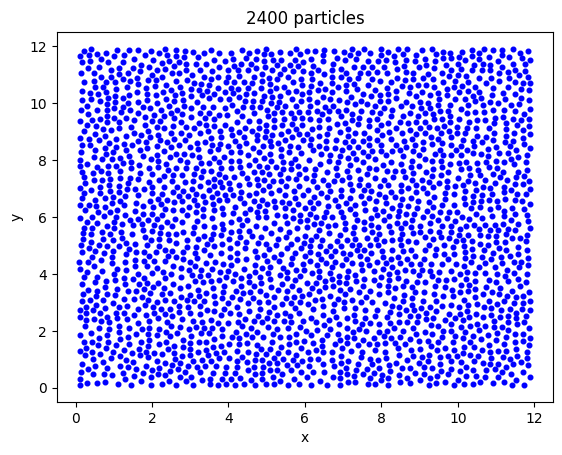

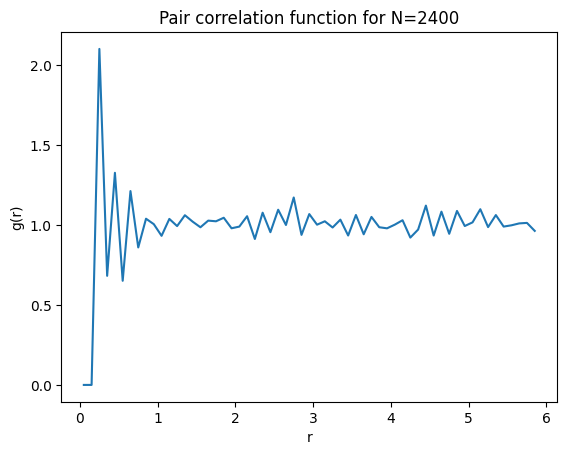

In [ ]:
# From here onwards, the code is mine. I acknowledge help from Amelia Greathouse. 

p2400 = np.loadtxt(r"C:\Users\katdu\OneDrive\Documents\WINTER 2025\PHYS 559\non_overlapping_disks_N2400_L12.txt") # Read in position data 
print(np.shape(p2400)) # Prints number of points in array 

p2400x = p2400[:,0] # All x positions
p2400y = p2400[:,1] # All y positions

plt.title("2400 particles")
plt.scatter(p2400x,p2400y,color="blue",s=11) # Setting up scatterplot 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Set variables for pair correlation function defined earlier
x = p2400x
y = p2400y
S = 12
rMax = 5.8 # Max is 6, but be careful not to run into the walls! Play around w diff values to see which work
dr = 0.1 

g_average, radii, interior_indices = pairCorrelationFunction_2D(x, y, S, rMax, dr)

plt.plot(radii, g_average)
plt.title("Pair correlation function for N=2400")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()

(1500, 2)


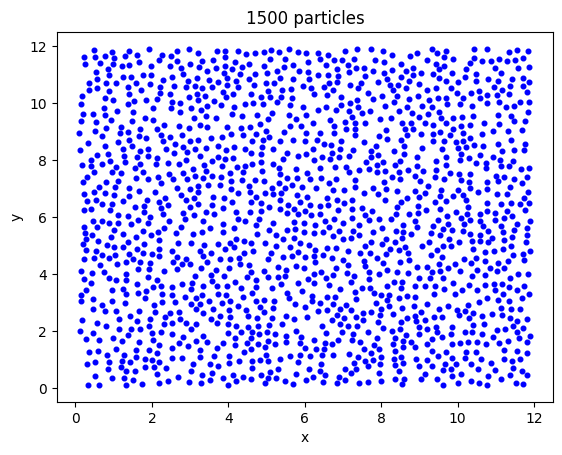

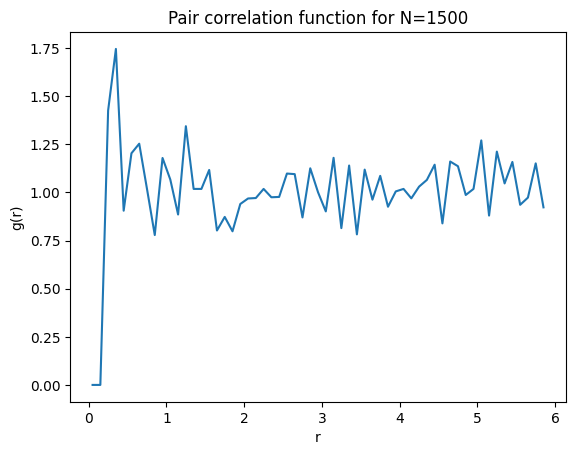

In [6]:
p1500 = np.loadtxt(r"C:\Users\katdu\OneDrive\Documents\WINTER 2025\PHYS 559\non_overlapping_disks_N1500_L12.txt") # read in position data 
print(np.shape(p1500)) 

p1500x = p1500[:,0] 
p1500y = p1500[:,1] 

plt.title("1500 particles")
plt.scatter(p1500x,p1500y,color="blue",s=11) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x = p1500x
y = p1500y
S = 12
rMax = 5.8 
dr = 0.1 

g_average, radii, interior_indices = pairCorrelationFunction_2D(x, y, S, rMax, dr)

plt.plot(radii, g_average)
plt.title("Pair correlation function for N=1500")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()

(1000, 2)


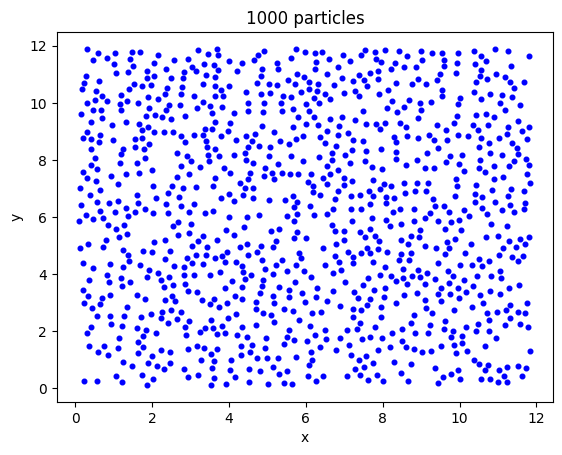

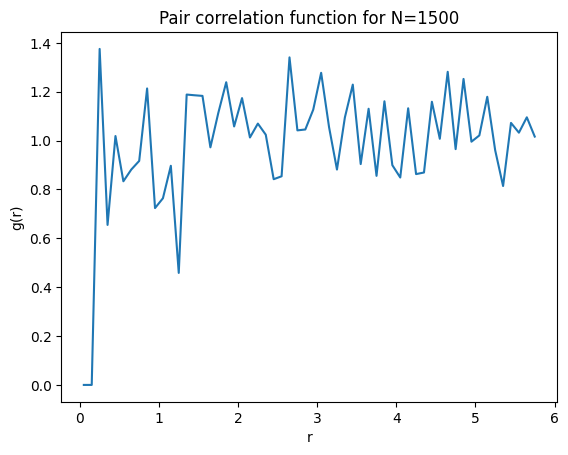

In [12]:
p1000 = np.loadtxt(r"C:\Users\katdu\OneDrive\Documents\WINTER 2025\PHYS 559\non_overlapping_disks_N1000_L12.txt") # read in position data 
print(np.shape(p1000)) 

p1000x = p1000[:,0]
p1000y = p1000[:,1] 

plt.title("1000 particles")
plt.scatter(p1000x,p1000y,color="blue",s=11) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x = p1000x
y = p1000y
S = 12
rMax = 5.75
dr = 0.1 

g_average, radii, interior_indices = pairCorrelationFunction_2D(x, y, S, rMax, dr)

plt.plot(radii, g_average)
plt.title("Pair correlation function for N=1500")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()

(4140, 2)


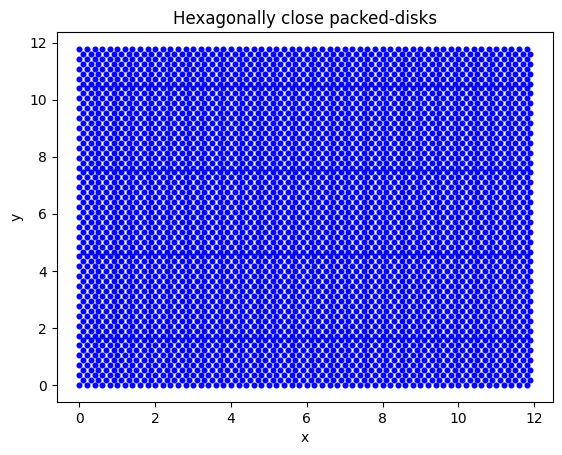

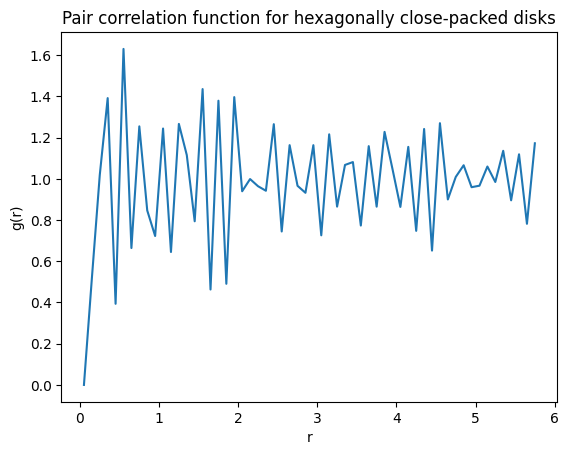

In [40]:
hex = np.loadtxt(r"C:\Users\katdu\OneDrive\Documents\WINTER 2025\PHYS 559\hexagonally_packed_disks.txt") # read in position data 
print(np.shape(hex)) 

hexx = hex[:,0] 
hexy = hex[:,1] 

plt.title("Hexagonally close packed-disks")
plt.scatter(hexx,hexy,color="blue",s=11) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x = hexx
y = hexy
S = 12
rMax = 5.7
dr = 0.1 

g_average, radii, interior_indices = pairCorrelationFunction_2D(x, y, S, rMax, dr)

plt.plot(radii, g_average)
plt.title("Pair correlation function for hexagonally close-packed disks")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()

(2800, 2)


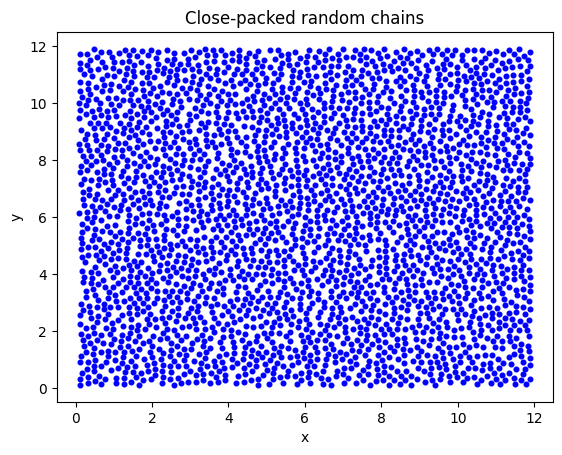

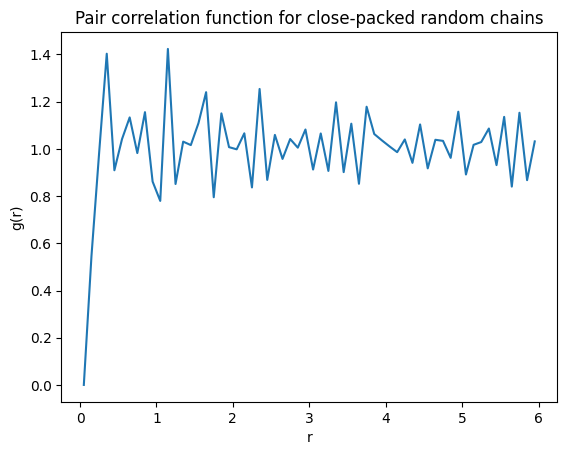

In [36]:
rand = np.loadtxt(r"C:\Users\katdu\OneDrive\Documents\WINTER 2025\PHYS 559\packed_branched_chains.txt") # read in position data 
print(np.shape(rand)) 

randx = rand[:,0] 
randy = rand[:,1] 

plt.title("Close-packed random chains")
plt.scatter(randx,randy,color="blue",s=11) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x = randx
y = randy
S = 12
rMax = 5.9 
dr = 0.1 

g_average, radii, interior_indices = pairCorrelationFunction_2D(x, y, S, rMax, dr)

plt.plot(radii, g_average)
plt.title("Pair correlation function for close-packed random chains")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()

(10000, 2)


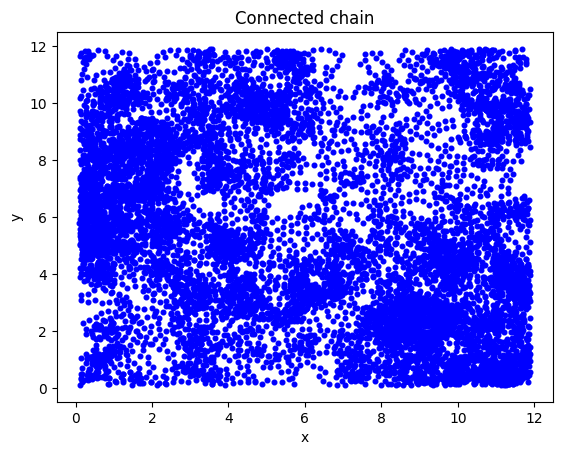

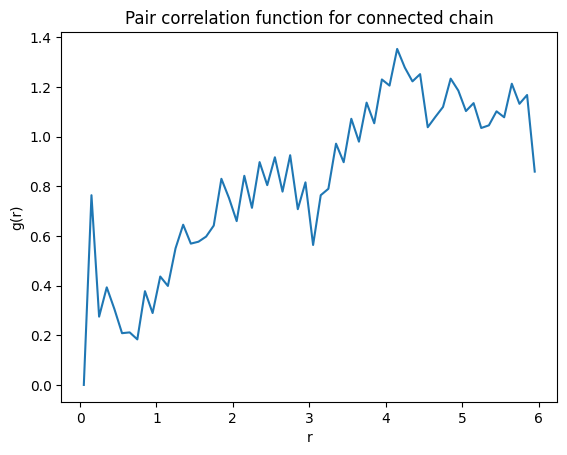

In [21]:
con = np.loadtxt(r"C:\Users\katdu\OneDrive\Documents\WINTER 2025\PHYS 559\connected_disk_chain.txt") # read in position data 
print(np.shape(con)) 

conx = con[:,0] 
cony = con[:,1] 

plt.title("Connected chain")
plt.scatter(conx,cony,color="blue",s=11) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x = conx
y = cony
S = 12
rMax = 5.9 
dr = 0.1 

g_average, radii, interior_indices = pairCorrelationFunction_2D(x, y, S, rMax, dr)

plt.plot(radii, g_average)
plt.title("Pair correlation function for connected chain")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()

## 2b) 

(a) Random order system with translational and rotational symmetry (similar to liquid structure). Clear maximum peak at around r=0.25, then a couple closer to r=1. The plot levels out after r=1, although it it appears to have a small-amplitude beating pattern. This looks like the plot we saw in lecture; The first peak is due to the closeness of the first “shell” around the central particle, the second “beat” peak is due to the second “shell,” etc. 

(b) Random order system with translational and rotational symmetry. Similar to (a), but the pattern (maximum peak, beating pattern) has shifted in the positive direction along the r axis. This makes sense, since fewer particles in the same area means they’re further apart, though the same amount of (dis)order remains. 

(c) Random order system with translational and rotational symmetry. Similar idea as (a & b), where we now have even fewer particles (still randomly ordered) occupying the same area. 

(d) Crystalline ordered, and the pair correlation function plot actually looks like that of a crystalline system. 

(e) Random order with translational and rotational symmetry. This actually looks a bit like the pair correlation function for glass. 

(f) Disorder and lack of symmetry, scale invariant. The plot has an overall positive-slope trend, which is associated with clustering.

In [27]:
# 2b, calculating area fraction as function of number of particles (areas don't change!)

def af(n):
   at = 144 #total area
   ap = np.pi*pow(0.1,2) #area of particle

   phi = (ap*n)/at 

   return phi

##2c) 

(a) Clear maximum peak at around r=0.25, then a couple closer to r=1. The first peak is due to the closeness of the first “shell” around the central particle, the second “beat” peak is due to the second “shell,” etc. This corresponds to a disordered and symmetric system. 

(b) Similar to peak pattern as in (a), but the pattern has shifted in the positive r direction. Since fewer particles in the same space means they’re further apart from each other, though the same amount of (dis)order remains. 

(c) There is a dip between 1<r<2, which is due to the increased free space between each particle (probability of finding a neighboring particle decreases as the number of particles in the space decreases!). 

(d) There is peak around r=0.75, another around r=1.75, r=3.25, and r=4.5. This is what we would expect to see with crystalline order. 

(e) There are two main peaks, one around r=0.5 and the other at about r=1.25. This pair correlation function looks similar to that of (a, b, & c), and actually looks a bit like the pair correlation function for glass. 

(f) There is one prominent peak around r=0.25 and a major dip around r=0.75, meaning it’s overall less probable to find a neighboring particle close to the central particle, but more probably to find dense clusters further away. The plot has an overall positive-slope trend, which is associated with clustering.

In [32]:
print("Volume (area) fraction for...")
print("(a)", af(2400))
print("(b)", af(1500))
print("(c)", af(1000))
print("(d)", af(4140))
print("(e)", af(2800))

Volume (area) fraction for...
(a) 0.5235987755982988
(b) 0.3272492347489368
(c) 0.21816615649929122
(d) 0.9032078879070657
(e) 0.6108652381980154
